In [1]:
from util.preprocessing import refine, initialize_tokenizer, vectorize
from util.embeddings import load_glove, load_word2vec_pretrained
from sklearn.datasets import fetch_20newsgroups
from util.NLP import NLPModel
from util.constants import TEST_SIZE, GLOVE, WORD2VEC, MODEL_TYPE_CNN, MODEL_TYPE_LSTM, MODEL_TYPE_CNN_LSTM
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers'))
texts = newsgroups.data
labels = newsgroups.target

In [3]:
refined_texts = refine(texts)
tokenizer = initialize_tokenizer(refined_texts)
preprocessed_texts = vectorize(tokenizer, refined_texts)

In [4]:
glove_embedding_index = load_glove()

Found 400000 word vectors.


In [5]:
word2vec_pretrained_embedding_index = load_word2vec_pretrained()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(preprocessed_texts, labels, test_size=TEST_SIZE, shuffle=True)

In [7]:
glove_CNN = NLPModel(word_embedding=GLOVE,
                     model_type=MODEL_TYPE_CNN,
                     tokenizer=tokenizer, 
                     embeddings=glove_embedding_index)

glove_LSTM = NLPModel(word_embedding=GLOVE,
                     model_type=MODEL_TYPE_LSTM,
                     tokenizer=tokenizer,
                     embeddings=glove_embedding_index)

glove_CNN_LSTM = NLPModel(word_embedding=GLOVE,
                          model_type=MODEL_TYPE_CNN_LSTM,
                          tokenizer=tokenizer,
                          embeddings=glove_embedding_index)


word2vec_CNN = NLPModel(word_embedding=WORD2VEC,
                        model_type=MODEL_TYPE_CNN,
                        tokenizer=tokenizer,
                        embeddings=word2vec_pretrained_embedding_index)


word2vec_LSTM = NLPModel(word_embedding=WORD2VEC,
                         model_type=MODEL_TYPE_LSTM,
                         tokenizer=tokenizer,
                         embeddings=word2vec_pretrained_embedding_index)

word2vec_CNN_LSTM = NLPModel(word_embedding=WORD2VEC,
                             model_type=MODEL_TYPE_CNN_LSTM,
                             tokenizer=tokenizer,
                             embeddings=word2vec_pretrained_embedding_index)





In [8]:
glove_CNN.train(x_train, y_train)

Epoch 1/10
106/106 [==============================] - 15s 140ms/step - loss: 1.8296 - accuracy: 0.4448 - val_loss: 1.1798 - val_accuracy: 0.6061
Epoch 2/10
106/106 [==============================] - 15s 141ms/step - loss: 0.9168 - accuracy: 0.7204 - val_loss: 0.9918 - val_accuracy: 0.6771
Epoch 3/10
106/106 [==============================] - 16s 153ms/step - loss: 0.6399 - accuracy: 0.8158 - val_loss: 0.8616 - val_accuracy: 0.7241
Epoch 4/10
106/106 [==============================] - 16s 147ms/step - loss: 0.4457 - accuracy: 0.8823 - val_loss: 0.8267 - val_accuracy: 0.7381
Epoch 5/10
106/106 [==============================] - 16s 147ms/step - loss: 0.3065 - accuracy: 0.9298 - val_loss: 0.8085 - val_accuracy: 0.7520
Epoch 6/10
106/106 [==============================] - 16s 149ms/step - loss: 0.2081 - accuracy: 0.9603 - val_loss: 0.8121 - val_accuracy: 0.7566
Epoch 7/10
106/106 [==============================] - 16s 148ms/step - loss: 0.1379 - accuracy: 0.9794 - val_loss: 0.8011 - val_ac

In [9]:
glove_LSTM.train(x_train, y_train)

Epoch 1/10
106/106 [==============================] - 38s 358ms/step - loss: 3.0706 - accuracy: 0.1224 - val_loss: 2.4972 - val_accuracy: 0.1969
Epoch 2/10
106/106 [==============================] - 39s 369ms/step - loss: 2.1580 - accuracy: 0.3202 - val_loss: 2.0564 - val_accuracy: 0.3176
Epoch 3/10
106/106 [==============================] - 37s 347ms/step - loss: 1.7212 - accuracy: 0.4648 - val_loss: 1.5835 - val_accuracy: 0.4828
Epoch 4/10
106/106 [==============================] - 38s 358ms/step - loss: 1.4007 - accuracy: 0.5601 - val_loss: 1.3148 - val_accuracy: 0.5942
Epoch 5/10
106/106 [==============================] - 37s 351ms/step - loss: 1.1752 - accuracy: 0.6314 - val_loss: 1.1922 - val_accuracy: 0.6293
Epoch 6/10
106/106 [==============================] - 37s 350ms/step - loss: 1.0185 - accuracy: 0.6809 - val_loss: 1.0343 - val_accuracy: 0.6877
Epoch 7/10
106/106 [==============================] - 37s 351ms/step - loss: 0.9136 - accuracy: 0.7130 - val_loss: 0.9849 - val_ac

In [10]:
glove_CNN_LSTM.train(x_train, y_train)

Epoch 1/10
106/106 [==============================] - 27s 250ms/step - loss: 1.9267 - accuracy: 0.3709 - val_loss: 1.4451 - val_accuracy: 0.5265
Epoch 2/10
106/106 [==============================] - 26s 250ms/step - loss: 1.2203 - accuracy: 0.5884 - val_loss: 1.1475 - val_accuracy: 0.6028
Epoch 3/10
106/106 [==============================] - 26s 242ms/step - loss: 0.9867 - accuracy: 0.6747 - val_loss: 1.0508 - val_accuracy: 0.6611
Epoch 4/10
106/106 [==============================] - 25s 239ms/step - loss: 0.8256 - accuracy: 0.7309 - val_loss: 0.9693 - val_accuracy: 0.6903
Epoch 5/10
106/106 [==============================] - 25s 239ms/step - loss: 0.7127 - accuracy: 0.7760 - val_loss: 0.9139 - val_accuracy: 0.7175
Epoch 6/10
106/106 [==============================] - 25s 238ms/step - loss: 0.6038 - accuracy: 0.8104 - val_loss: 0.8693 - val_accuracy: 0.7314
Epoch 7/10
106/106 [==============================] - 25s 234ms/step - loss: 0.5196 - accuracy: 0.8381 - val_loss: 0.8558 - val_ac

In [11]:
word2vec_CNN.train(x_train, y_train)

Epoch 1/10
106/106 [==============================] - 16s 150ms/step - loss: 2.0737 - accuracy: 0.3709 - val_loss: 1.2944 - val_accuracy: 0.5822
Epoch 2/10
106/106 [==============================] - 16s 149ms/step - loss: 1.0879 - accuracy: 0.6556 - val_loss: 1.0830 - val_accuracy: 0.6426
Epoch 3/10
106/106 [==============================] - 16s 148ms/step - loss: 0.8224 - accuracy: 0.7500 - val_loss: 0.9941 - val_accuracy: 0.6790
Epoch 4/10
106/106 [==============================] - 16s 152ms/step - loss: 0.6409 - accuracy: 0.8129 - val_loss: 0.9402 - val_accuracy: 0.7009
Epoch 5/10
106/106 [==============================] - 16s 149ms/step - loss: 0.5099 - accuracy: 0.8615 - val_loss: 0.8881 - val_accuracy: 0.7162
Epoch 6/10
106/106 [==============================] - 16s 149ms/step - loss: 0.3983 - accuracy: 0.8989 - val_loss: 0.8336 - val_accuracy: 0.7334
Epoch 7/10
106/106 [==============================] - 16s 151ms/step - loss: 0.3007 - accuracy: 0.9342 - val_loss: 0.8457 - val_ac

In [12]:
word2vec_LSTM.train(x_train, y_train)

Epoch 1/10
106/106 [==============================] - 34s 316ms/step - loss: 3.1921 - accuracy: 0.0963 - val_loss: 2.7200 - val_accuracy: 0.1684
Epoch 2/10
106/106 [==============================] - 36s 339ms/step - loss: 2.5632 - accuracy: 0.1916 - val_loss: 2.4045 - val_accuracy: 0.2102
Epoch 3/10
106/106 [==============================] - 36s 339ms/step - loss: 2.2911 - accuracy: 0.2495 - val_loss: 2.1579 - val_accuracy: 0.2294
Epoch 4/10
106/106 [==============================] - 36s 338ms/step - loss: 2.1813 - accuracy: 0.2811 - val_loss: 2.0274 - val_accuracy: 0.2871
Epoch 5/10
106/106 [==============================] - 37s 345ms/step - loss: 1.9168 - accuracy: 0.3449 - val_loss: 1.8659 - val_accuracy: 0.3395
Epoch 6/10
106/106 [==============================] - 36s 337ms/step - loss: 1.7701 - accuracy: 0.3987 - val_loss: 1.7329 - val_accuracy: 0.3999
Epoch 7/10
106/106 [==============================] - 35s 333ms/step - loss: 1.6335 - accuracy: 0.4458 - val_loss: 1.5990 - val_ac

In [13]:
word2vec_CNN_LSTM.train(x_train, y_train)

Epoch 1/10
106/106 [==============================] - 25s 231ms/step - loss: 2.0973 - accuracy: 0.2983 - val_loss: 1.6053 - val_accuracy: 0.4198
Epoch 2/10
106/106 [==============================] - 25s 237ms/step - loss: 1.4039 - accuracy: 0.5038 - val_loss: 1.3361 - val_accuracy: 0.5332
Epoch 3/10
106/106 [==============================] - 25s 238ms/step - loss: 1.1621 - accuracy: 0.6031 - val_loss: 1.1588 - val_accuracy: 0.5995
Epoch 4/10
106/106 [==============================] - 25s 232ms/step - loss: 1.0126 - accuracy: 0.6526 - val_loss: 1.0441 - val_accuracy: 0.6459
Epoch 5/10
106/106 [==============================] - 24s 231ms/step - loss: 0.8643 - accuracy: 0.7084 - val_loss: 1.0851 - val_accuracy: 0.6439
Epoch 6/10
106/106 [==============================] - 24s 229ms/step - loss: 0.7727 - accuracy: 0.7415 - val_loss: 0.9550 - val_accuracy: 0.6797
Epoch 7/10
106/106 [==============================] - 24s 230ms/step - loss: 0.6595 - accuracy: 0.7880 - val_loss: 0.9776 - val_ac

In [14]:
models = [glove_CNN, glove_LSTM, glove_CNN_LSTM, word2vec_CNN, word2vec_LSTM, word2vec_CNN_LSTM]

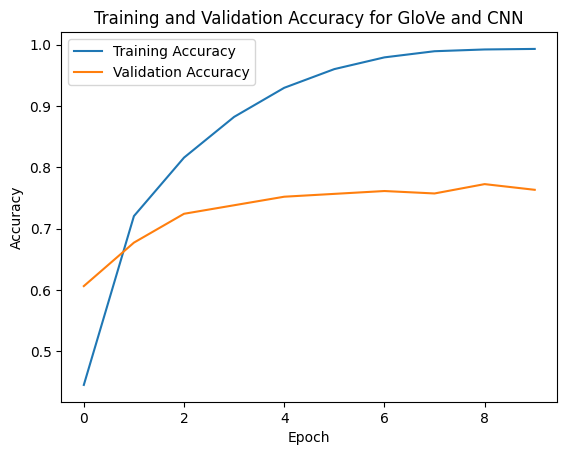

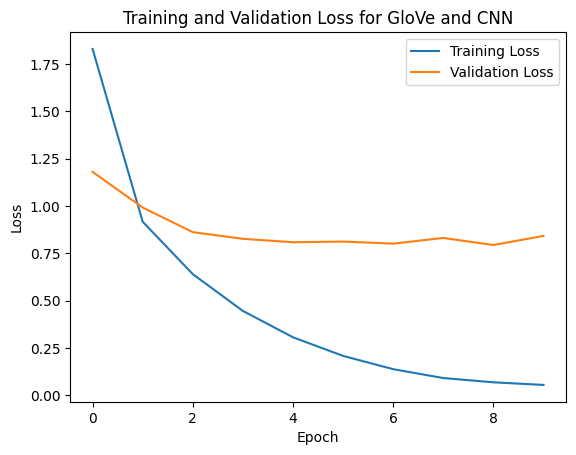

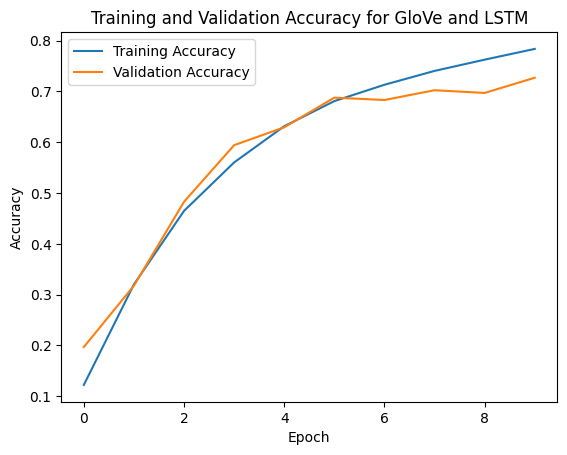

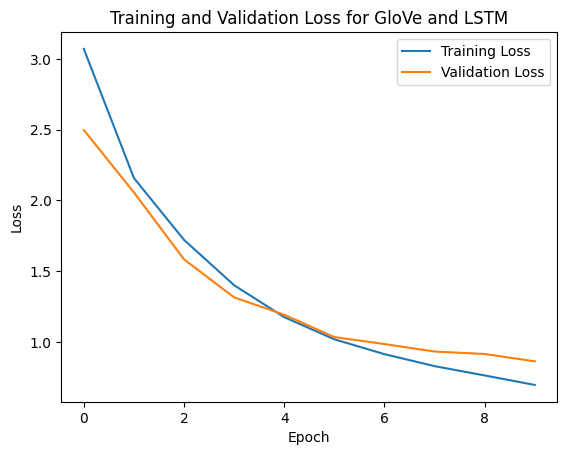

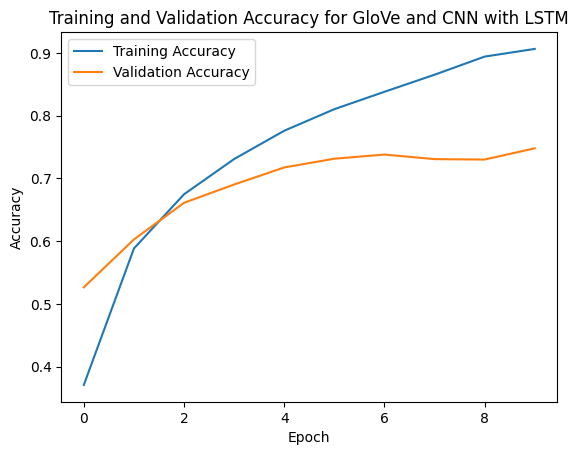

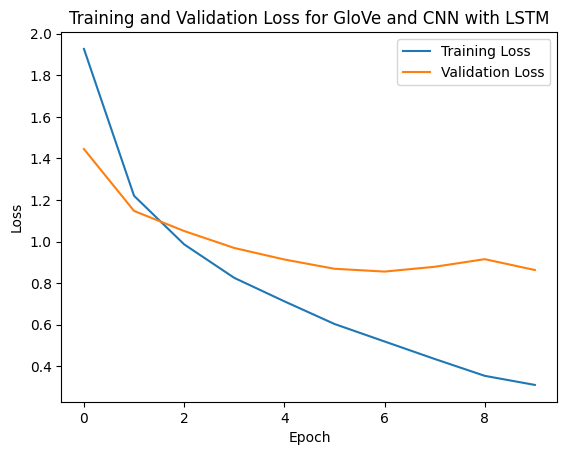

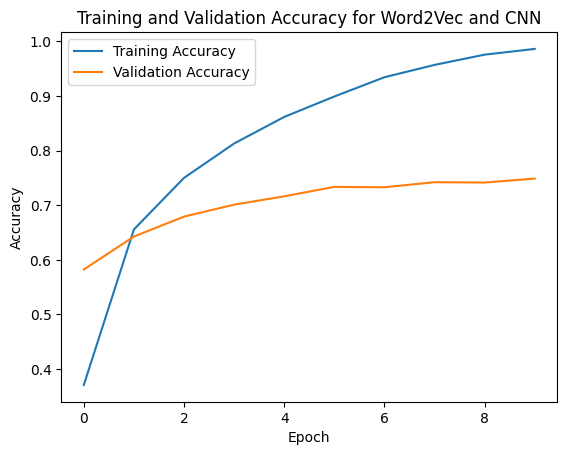

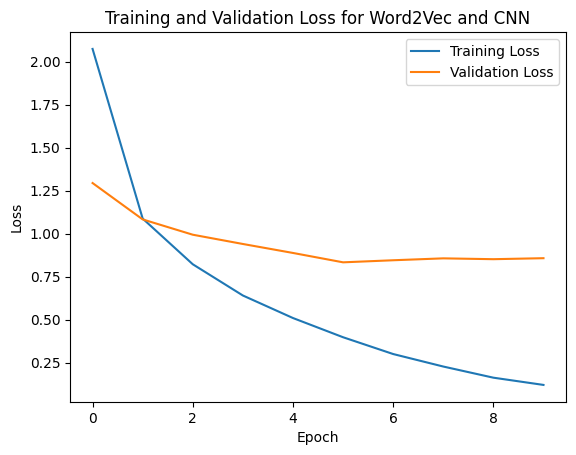

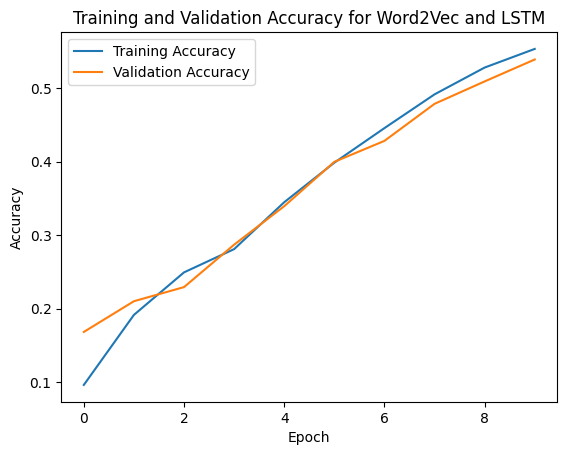

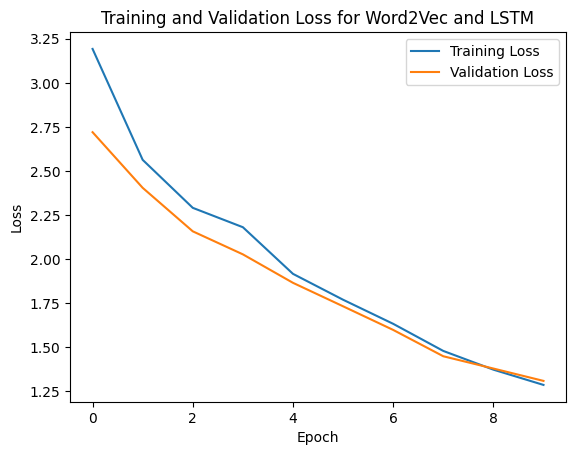

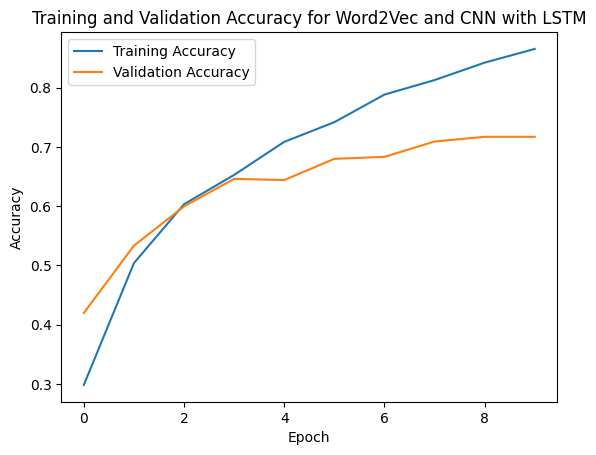

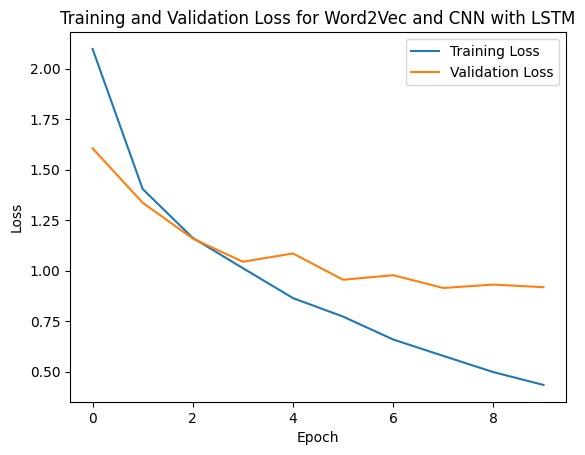

In [15]:
for model in models:
    model.plot_accuracy()
    model.plot_loss()


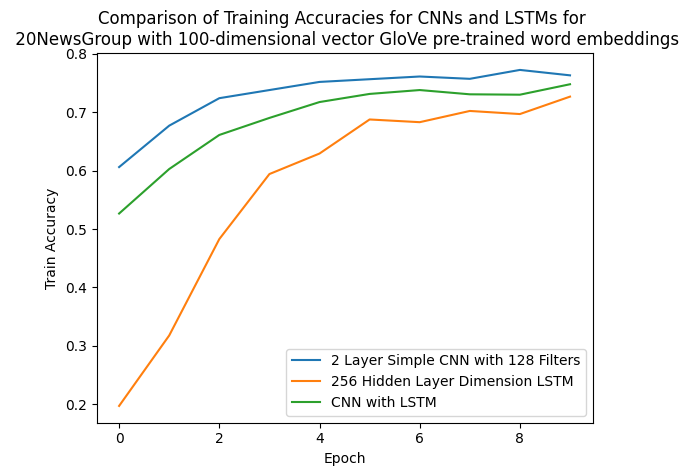

In [18]:


    
    plt.plot(glove_CNN.model_history.history['val_accuracy'], label = '2 Layer Simple CNN with 128 Filters')
    plt.plot(glove_LSTM.model_history.history['val_accuracy'], label = '256 Hidden Layer Dimension LSTM')
    plt.plot(glove_CNN_LSTM.model_history.history['val_accuracy'], label = 'CNN with LSTM')
    
    plt.legend()
    plt.title("Comparison of Training Accuracies for CNNs and LSTMs for \n 20NewsGroup with 100-dimensional vector GloVe pre-trained word embeddings")
    plt.ylabel("Train Accuracy")
    plt.xlabel("Epoch")
    plt.show()

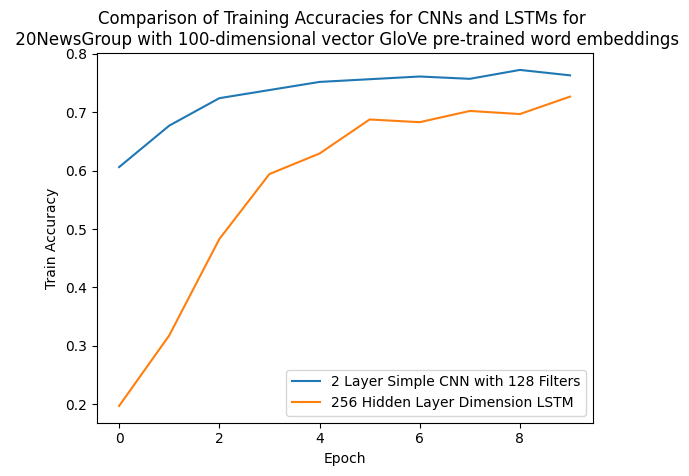

In [17]:
from matplotlib import pyplot as plt

plt.plot(glove_CNN.model_history.history['val_accuracy'], label = '2 Layer Simple CNN with 128 Filters')
plt.plot(glove_LSTM.model_history.history['val_accuracy'], label = '256 Hidden Layer Dimension LSTM')

plt.legend()
plt.title("Comparison of Training Accuracies for CNNs and LSTMs for \n 20NewsGroup with 100-dimensional vector GloVe pre-trained word embeddings")
plt.ylabel("Train Accuracy")
plt.xlabel("Epoch")
plt.show()